In [12]:
import glacierml as gl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
from matplotlib import ticker
import configparser
import pandas as pd
pd.set_option('display.max_columns', None)


In [13]:
# (
#     x,y,z,
#     x_new,y_new,z_new ,
#     far_ind, est_ind 
# ) = gl.assign_arrays(
#     parameterization = '4',method = '1', loss = 'mae',
# #     analysis = 'vol',
#     size_thresh_1 = 1e-5, size_thresh_2 = 1e4
# )
df = gl.load_notebook_data('4')
df = df.dropna(subset = 'FMT')
x = df['FMT'] / 1e3 * df['Area']
y = df['WT1'] / 1e3 * df['Area']
xy = np.vstack([np.log10(x),np.log10(y)])
z = gaussian_kde(xy)(xy)

bins_x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 25)
bins_y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 25)

2.0.0


Drawing scatter plot...
Drawing done
Setting scales and labels...


Text(10, 3500, 'B.')

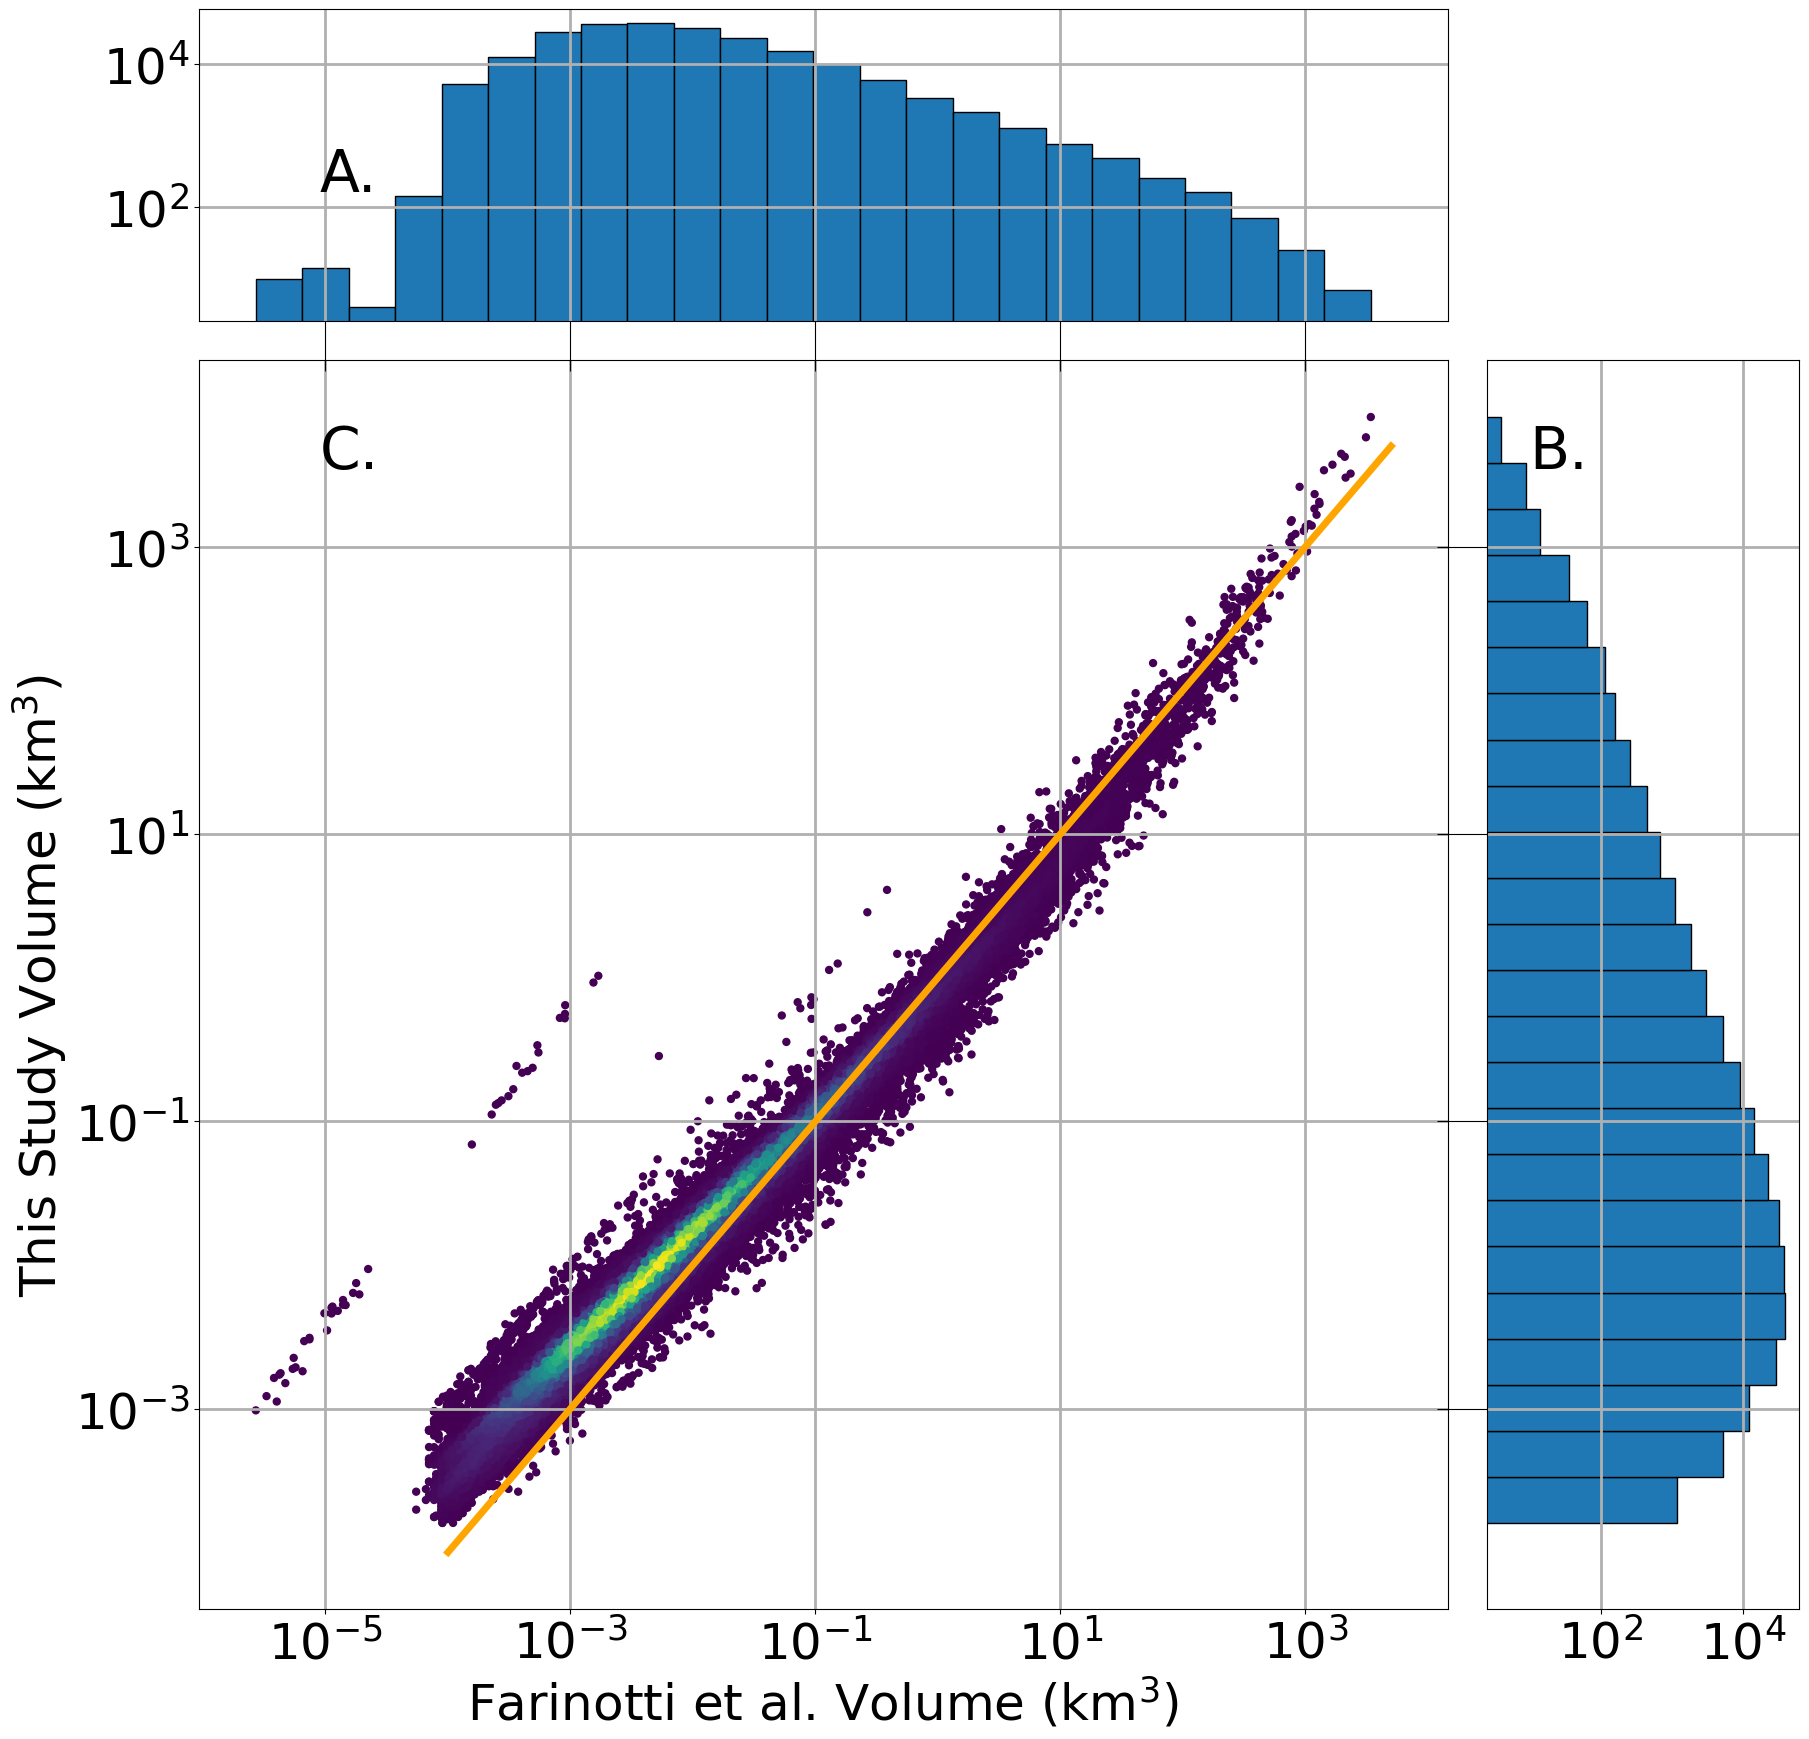

In [14]:
def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
    ax_histy.tick_params(axis="y", labelleft=False, size = 36)

    # the scatter plot:
    ax.scatter(x, y, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.'
              )
    ax.plot(
        (0.0001,5000),
        (0.0001,5000),
        '-',
        c = 'orange',
        linewidth = 5

    )

    ax_histx.hist(
        (x), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )

    ax_histy.hist(
        (y), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=36)
    ax_histy.tick_params(axis="y", labelsize=36)
    ax_histy.grid(alpha = 1,linewidth = 2)
    ax_histx.grid(alpha = 1,linewidth = 2)

fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


print('Drawing scatter plot...')
scatter_hist(
    x, 
    y,
    ax, 
    ax_histx,
    ax_histy,
)
# plt.grid()
print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('This Study Volume (km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (km$^3$)', fontsize = 36)
# major_ticks = [1e-5,1e0,1e1,1e4]
# ax.set_xticks(major_ticks)
# ax.set_yticks(major_ticks)
ax.minorticks_on()

ax.grid(which = 'major',alpha = 1,linewidth = 2)
ax.grid(which = 'minor',alpha = 1,linewidth = 1,linestyle = '--')
plt.text(1e-16, 300000, 'A.',fontsize = 42)
plt.text(1e-16, 3500, 'C.',fontsize = 42)
plt.text(10, 3500, 'B.',fontsize = 42)

2.0.0
2.0.0


4it [00:17,  4.41s/it]


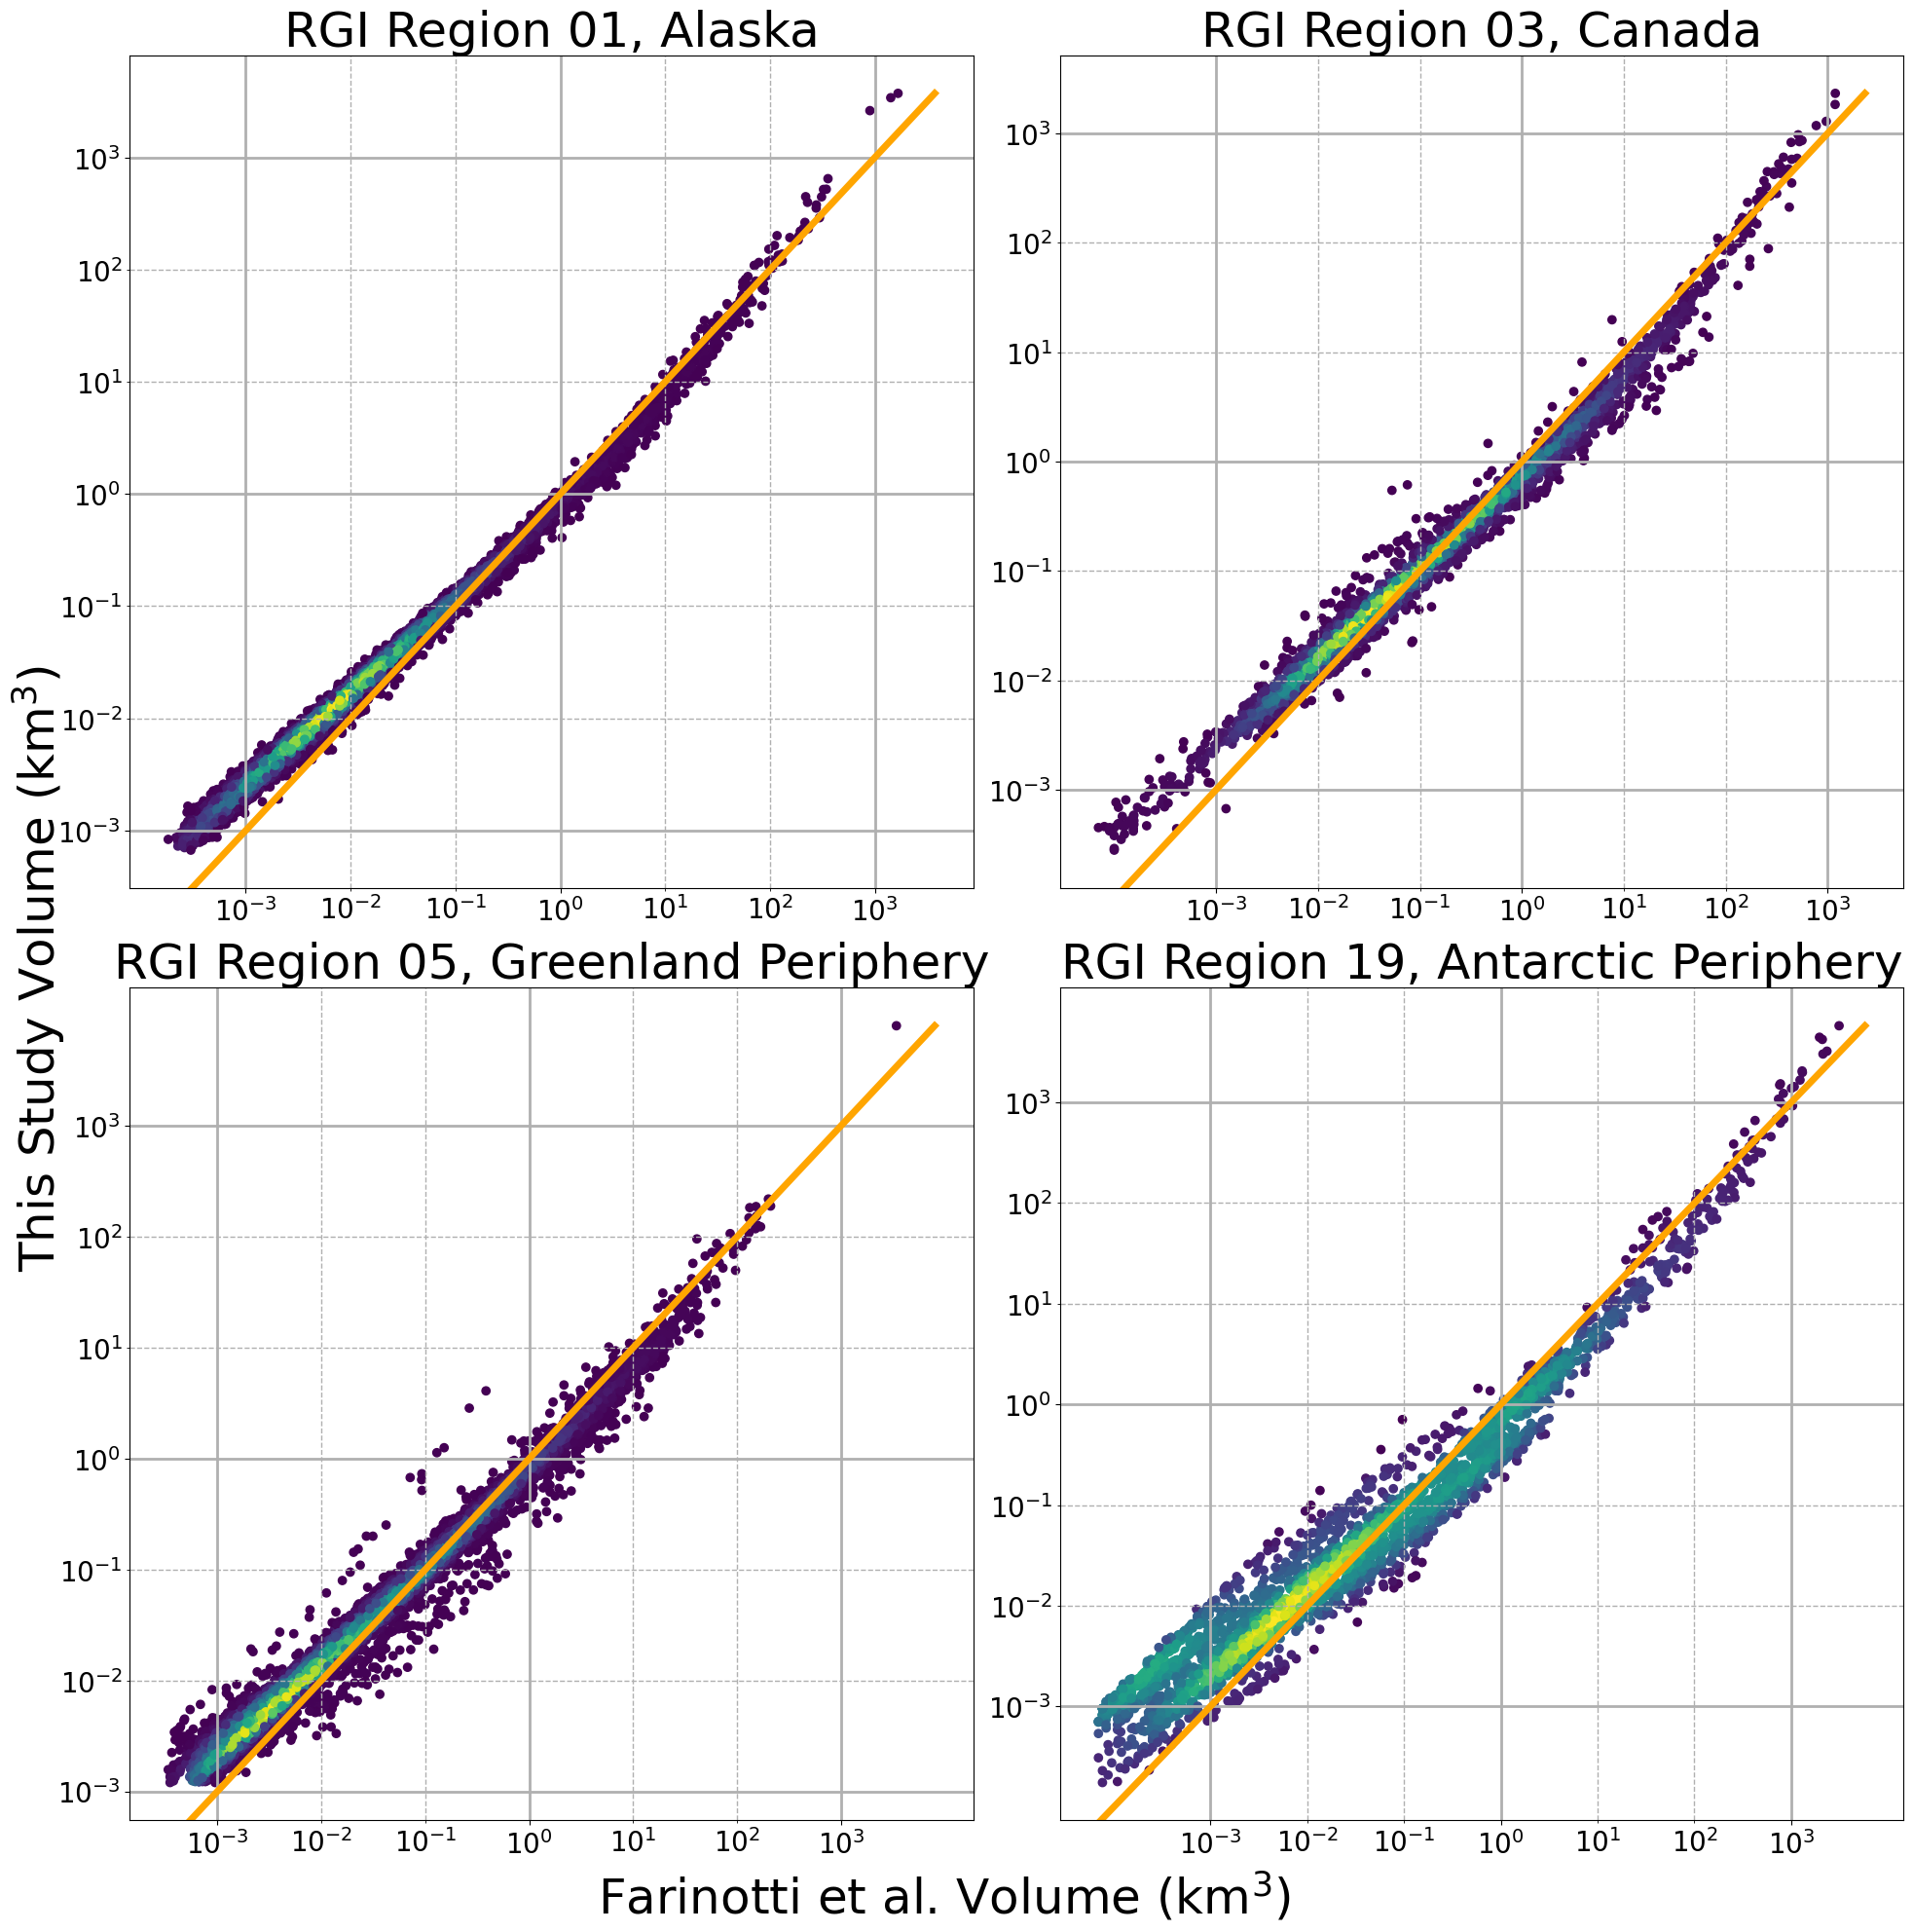

In [15]:
parameterized_data = gl.load_training_data(RGI_input = 'y')
data = gl.load_notebook_data('4')
data = data.dropna(subset = 'FMT')
fig = plt.figure(figsize=(20,20))
for n, region in tqdm(enumerate(['01', '03', '05', '19'])):
    if region == '01':
        region_name = 'Alaska'
    if region == '03':
        region_name = 'Canada'
    if region == '05':
        region_name = 'Greenland Periphery'
    if region == '19':
        region_name = 'Antarctic Periphery'
    df = data[data['region']==region]
    param = parameterized_data[parameterized_data['region'] == region]
    data_1 = df['FMT'] / 1e3 * df['Area']
    vol_f = data_1

    data_2 = df['WT1'] / 1e3 * df['Area']
    vol_e = data_2

    x_1 = np.sort(data_1)
    y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

    x_2 = np.sort(data_2)
    y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

    xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

    z = gaussian_kde(xy)(xy)

    ax = plt.subplot(2,2,n+1)
    ax.scatter(vol_f, vol_e, 
               c = (z), 
#                s = 100,
               cmap = 'viridis',
#                marker = '.'
              )
    ax.plot(
        (0,round(vol_e.max()/ (vol_e.max()/2))*(vol_e.max()/2)),
        (0,round(vol_e.max()/(vol_e.max()/2))*(vol_e.max()/2)),
        '-',
        c = 'orange',
        linewidth = 5

    )
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title('RGI Region '+ region + ', ' + region_name,
                 fontsize = 36#                  '\n' + 
#                  str(np.round((len(df)/len(data)) * 100, 2)) + '% of world glaciers\n'+
#                  str(np.round((len(param) / len(parameterized_data)) * 100, 2)) + 
#                  '% of training data'
#                 , fontsize
                )
    major_ticks = np.logspace(-3,3,3)
    minor_ticks = np.logspace(-2,2,5)
    ax.set_yticks(minor_ticks,minor = True)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks,minor = True)
    ax.set_xticks(major_ticks)

    ax.tick_params(axis="both",which = 'both', labelsize=20)
    ax.grid(which = 'major',linewidth = 2)
    ax.grid(which = 'minor',linewidth = 1,linestyle = '--')

#     ax.set_ylabel('E&L Volume (10$^3$ km$^3$)')
#     ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)')

# plt.suptitle(
#     'Regional Ice Volume Compared to Farinotti et al. 2019', fontsize = 36, y = .99)

fig.supylabel('This Study Volume (km$^3$)', fontsize = 36)
fig.supxlabel('Farinotti et al. Volume (km$^3$)', fontsize = 36)

plt.tight_layout()
# plt.savefig('figs/regional_scatter' + str(i) + '.png')